In [ ]:
import pandas as pd
import numpy as np
import os

os.chdir("/content/drive/MyDrive/ML 대회/HDD")
df = pd.read_csv("./train.csv",parse_dates=["assembly_time","process_time"])
df.head()

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect,status
0,HDDSN00000,CRSTR01L,2015-03-09 09:36:00,EGRWT0113,2015-03-09 11:33:55,4561.0,6083.0,1341.0,pass
1,HDDSN00001,CRSTR01Q,2015-03-10 02:13:00,EGRWT0102,2015-03-10 03:16:18,3898.0,1819.0,8037.0,pass
2,HDDSN00002,CRSTR01N,2015-03-06 23:06:00,EGRWT0103,2015-03-07 00:00:12,3016.0,4997.0,1583.0,pass
3,HDDSN00003,CRSTR01A,2015-03-08 05:10:00,EGRWT0107,2015-03-08 06:36:18,1605.0,4415.0,3345.0,pass
4,HDDSN00004,CRSTR01C,2015-03-09 06:44:00,EGRWT0113,2015-03-09 09:13:40,1002.0,2394.0,3296.0,pass


In [ ]:
df['status'].value_counts()

pass    22081
fail     9919
Name: status, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             32000 non-null  object        
 1   cr_ID          32000 non-null  object        
 2   assembly_time  32000 non-null  datetime64[ns]
 3   eq_ID          32000 non-null  object        
 4   process_time   32000 non-null  datetime64[ns]
 5   ramp           32000 non-null  float64       
 6   servo_defect   32000 non-null  float64       
 7   data_defect    32000 non-null  float64       
 8   status         32000 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 2.2+ MB


In [ ]:
df.shape

(32000, 9)

ID : HDD의 고유 product number

cr_ID : 조립장비의 고유 번호

assembly_time : 조립장비에서 조립이 시작된 시간

eq_ID : 후공정 장비의 고유 번호

process_time : 후공정이 시작된 시간

ramp : ramp라는 부품의 조립 공차를 후공정에서 측정한 값

servo_defect : 후공정에서 측정된 servo sector의 bad sector 개수

data_defect : 후공정에서 측정된 data sector의 bad sector 개수

status : 신뢰성 테스트의 결과

In [ ]:
df.head()

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect,status
0,HDDSN00000,CRSTR01L,2015-03-09 09:36:00,EGRWT0113,2015-03-09 11:33:55,4561.0,6083.0,1341.0,pass
1,HDDSN00001,CRSTR01Q,2015-03-10 02:13:00,EGRWT0102,2015-03-10 03:16:18,3898.0,1819.0,8037.0,pass
2,HDDSN00002,CRSTR01N,2015-03-06 23:06:00,EGRWT0103,2015-03-07 00:00:12,3016.0,4997.0,1583.0,pass
3,HDDSN00003,CRSTR01A,2015-03-08 05:10:00,EGRWT0107,2015-03-08 06:36:18,1605.0,4415.0,3345.0,pass
4,HDDSN00004,CRSTR01C,2015-03-09 06:44:00,EGRWT0113,2015-03-09 09:13:40,1002.0,2394.0,3296.0,pass


In [ ]:
df.isnull().sum()

ID               0
cr_ID            0
assembly_time    0
eq_ID            0
process_time     0
ramp             0
servo_defect     0
data_defect      0
status           0
dtype: int64

# 0. 전처리

(1) 범주형 변수 변환

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['cr_ID'] = le.fit_transform(df['cr_ID'])
# df['eq_ID'] = le.fit_transform(df['eq_ID'])
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             32000 non-null  object        
 1   cr_ID          32000 non-null  int64         
 2   assembly_time  32000 non-null  datetime64[ns]
 3   eq_ID          32000 non-null  int64         
 4   process_time   32000 non-null  datetime64[ns]
 5   ramp           32000 non-null  float64       
 6   servo_defect   32000 non-null  float64       
 7   data_defect    32000 non-null  float64       
 8   status         32000 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# 범주형 변수
categorical_feature_names = ['ID','cr_ID', 'eq_ID' ]

for var in categorical_feature_names:
    df[var] = df[var].astype("category")  #카테고리화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             32000 non-null  category      
 1   cr_ID          32000 non-null  category      
 2   assembly_time  32000 non-null  datetime64[ns]
 3   eq_ID          32000 non-null  category      
 4   process_time   32000 non-null  datetime64[ns]
 5   ramp           32000 non-null  float64       
 6   servo_defect   32000 non-null  float64       
 7   data_defect    32000 non-null  float64       
 8   status         32000 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(3), object(1)
memory usage: 3.1+ MB


(2) 시간 데이터 처리

In [ ]:
# 조립 시작 시간
df["assem_year"] = df["assembly_time"].dt.year
df["assem_month"] = df["assembly_time"].dt.month
df["assem_day"] = df["assembly_time"].dt.day
df["assem_hour"] = df["assembly_time"].dt.hour
df["assem_min"] = df["assembly_time"].dt.minute
df["assem_sec"] = df["assembly_time"].dt.second

In [ ]:
# 후공정 시작 시간
df["pro_year"] = df["process_time"].dt.year
df["pro_month"] = df["process_time"].dt.month
df["pro_day"] = df["process_time"].dt.day
df["pro_hour"] = df["process_time"].dt.hour
df["pro_min"] = df["process_time"].dt.minute
df["pro_sec"] = df["process_time"].dt.second

표준화

In [ ]:
from sklearn import preprocessing
df['ramp_scale'] = preprocessing.robust_scale(df['ramp'])
df['servo_scale'] = preprocessing.robust_scale(df['servo_defect'])
df["data_scale"] = preprocessing.robust_scale(df['data_defect'])

## 1. Feature Engineering

(1) 조립-후공정 시간

In [ ]:
# 후공정 시작 시간 - 조립 시작 시간
df["pro_assem"] = df["process_time"] - df["assembly_time"]
df["pro_assem"] = df["pro_assem"].dt.total_seconds()  # 초 단위로 변환

In [ ]:
df[["pro_assem"]].head()

,pro_assem
0,7075.0
1,3798.0
2,3252.0
3,5178.0
4,8980.0


(2) Frequency Encoding

In [ ]:
# categorical: cr_ID, eq_ID
cr_enc = df['cr_ID'].value_counts().to_dict()
df['cr_ID_counts'] = df['cr_ID'].map(cr_enc)
eq_enc = df['eq_ID'].value_counts().to_dict()
df['eq_ID_counts'] = df['eq_ID'].map(eq_enc)

(3) Aggregation/Statistics

In [ ]:
tmp1 = df.groupby('cr_ID')['ramp'].agg(['mean']).rename({'mean':'ramp_cr_mean'},axis=1)
tmp2 = df.groupby('cr_ID')['servo_defect'].agg(['mean']).rename({'mean':'servo_cr_mean'},axis=1)
tmp3 = df.groupby('cr_ID')['data_defect'].agg(['mean']).rename({'mean':'data_cr_mean'},axis=1)
tmp4 = df.groupby('cr_ID')['pro_assem'].agg(['mean']).rename({'mean':'cr_proassem'},axis=1)
df = pd.merge(df,tmp1,on='cr_ID',how='left')
df = pd.merge(df,tmp2,on='cr_ID',how='left')
df = pd.merge(df,tmp3,on='cr_ID',how='left')
df = pd.merge(df,tmp4,on='cr_ID',how='left')

In [ ]:
tmp1 = df.groupby('eq_ID')['ramp'].agg(['mean']).rename({'mean':'ramp_eq_mean'},axis=1)
tmp2 = df.groupby('eq_ID')['servo_defect'].agg(['mean']).rename({'mean':'servo_eq_mean'},axis=1)
tmp3 = df.groupby('eq_ID')['data_defect'].agg(['mean']).rename({'mean':'data_eq_mean'},axis=1)
tmp4 = df.groupby('eq_ID')['pro_assem'].agg(['mean']).rename({'mean':'eq_proassem'},axis=1)
df = pd.merge(df,tmp1,on='eq_ID',how='left')
df = pd.merge(df,tmp2,on='eq_ID',how='left')
df = pd.merge(df,tmp3,on='eq_ID',how='left')
df = pd.merge(df,tmp4,on='eq_ID',how='left')

In [ ]:
##dfver4
tmp1 = df.groupby('pro_day')['ramp'].agg(['sum']).rename({'sum':'ramp_pro_sum'},axis=1)
tmp2 = df.groupby('pro_day')['ramp'].agg(['mean']).rename({'mean':'ramp_pro_mean'},axis=1)
df = pd.merge(df,tmp1,on='pro_day',how='left')
df = pd.merge(df,tmp2,on='pro_day',how='left')

In [ ]:
##dfver4
df["defect_all"] = df["servo_defect"]+df["data_defect"] #총 bad sector 개수
df["defect_minus"]= abs(df["servo_defect"]-df["data_defect"])   #bad sector 차이
df["ramp_proassem"] = df["ramp"]/df["pro_assem"]  #ramp ratio

In [ ]:
df.head()

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect,status,assem_year,assem_month,assem_day,assem_hour,assem_min,assem_sec,pro_year,pro_month,pro_day,pro_hour,pro_min,pro_sec,ramp_scale,servo_scale,data_scale,pro_assem,cr_ID_counts,eq_ID_counts,ramp_cr_mean,servo_cr_mean,data_cr_mean,cr_proassem,ramp_eq_mean,servo_eq_mean,data_eq_mean,eq_proassem,ramp_pro_sum,ramp_pro_mean,defect_all,defect_minus,ramp_proassem
0,HDDSN00000,CRSTR01L,2015-03-09 09:36:00,EGRWT0113,2015-03-09 11:33:55,4561.0,6083.0,1341.0,pass,2015,3,9,9,36,0,2015,3,9,11,33,55,1.590083,1.284244,-0.632440,7075.0,1602,2103,2466.691011,4178.242821,3012.568664,5818.566167,2415.000951,4205.032335,3011.637660,5973.025202,11254793.0,2479.029295,7424.0,4742.0,0.644664
1,HDDSN00001,CRSTR01Q,2015-03-10 02:13:00,EGRWT0102,2015-03-10 03:16:18,3898.0,1819.0,8037.0,pass,2015,3,10,2,13,0,2015,3,10,3,16,18,1.224793,-1.457878,2.688988,3798.0,1600,2148,2448.328125,4206.899375,3051.370000,5846.791875,2502.050745,4204.669926,3020.332868,6082.363128,11484543.0,2478.321752,9856.0,6218.0,1.026330
2,HDDSN00002,CRSTR01N,2015-03-06 23:06:00,EGRWT0103,2015-03-07 00:00:12,3016.0,4997.0,1583.0,pass,2015,3,6,23,6,0,2015,3,7,0,0,12,0.738843,0.585852,-0.512401,3252.0,1632,2144,2453.363971,4109.984069,2993.390931,5700.965686,2453.709888,4214.579291,3025.781716,5935.769123,11192258.0,2449.607792,6580.0,3414.0,0.927429
3,HDDSN00003,CRSTR01A,2015-03-08 05:10:00,EGRWT0107,2015-03-08 06:36:18,1605.0,4415.0,3345.0,pass,2015,3,8,5,10,0,2015,3,8,6,36,18,-0.038567,0.211576,0.361607,5178.0,1602,2139,2445.822097,4180.051186,2956.224719,5829.666667,2493.205704,4203.809724,2987.555400,5984.484806,11506082.0,2539.413375,7760.0,1070.0,0.309965
4,HDDSN00004,CRSTR01C,2015-03-09 06:44:00,EGRWT0113,2015-03-09 09:13:40,1002.0,2394.0,3296.0,pass,2015,3,9,6,44,0,2015,3,9,9,13,40,-0.370799,-1.088103,0.337302,8980.0,1588,2103,2462.474811,4150.562972,2975.128463,5864.806675,2415.000951,4205.032335,3011.637660,5973.025202,11254793.0,2479.029295,5690.0,902.0,0.111581


In [ ]:
final_feat = features + ['cr_ID','eq_ID','status']
df[final_feat].to_csv("./preprocessed/df_ver4-no-le.csv",index=False)

(4) Clustering

## 2. Modeling

### 1) RandomForest

In [ ]:
from sklearn.model_selection import train_test_split

features = ['cr_ID_counts','eq_ID_counts','ramp_scale','servo_scale','data_scale',"assem_hour","assem_min","pro_day","pro_hour","pro_min","pro_sec",'pro_assem',
'ramp_cr_mean',	'servo_cr_mean','data_cr_mean',	'ramp_eq_mean',	'servo_eq_mean','data_eq_mean', 'cr_proassem','eq_proassem'
,"defect_all","defect_minus","ramp_proassem",'ramp_pro_sum','ramp_pro_mean']

X_train, X_test, y_train, y_test = train_test_split(df[features], df.status, test_size=0.25, stratify=df.status, random_state=123456)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
# rf.fit(df[features],df.status)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [ ]:
#### Ver4
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred = rf.predict(X_test)
cf = confusion_matrix(y_test, y_pred,labels=['pass','fail'])
p = precision_score(y_test, y_pred, pos_label='fail')
r = recall_score(y_test, y_pred, pos_label='fail')
f1 = f1_score(y_test, y_pred, pos_label='fail')
acc = accuracy_score(y_test, y_pred)

print(cf)
print("Precision:", p)
print("Recall:", r)
print("F1:", f1)
print("Accuracy:", acc)

[[4915  605]
 [  99 2381]]
Precision: 0.7973878097789685
Recall: 0.9600806451612903
F1: 0.8712038053421148
Accuracy: 0.912


In [ ]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=features, columns=["Importance"])
feat_importances.sort_values(by=['Importance'], axis=0, ascending=False)

,Importance
pro_assem,0.162100
ramp_pro_mean,0.127105
defect_all,0.106510
data_scale,0.081506
ramp_scale,0.060907
ramp_pro_sum,0.054376
servo_scale,0.052711
ramp_proassem,0.046018
pro_day,0.044976
defect_minus,0.035212


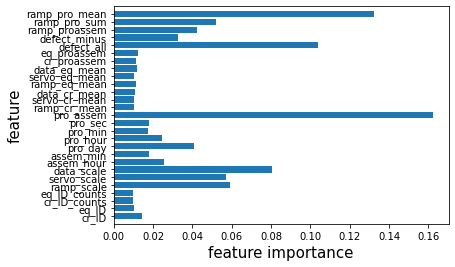

In [ ]:
import matplotlib.pyplot as plt
index = np.arange(df[features].shape[1])
plt.barh(index, rf.feature_importances_, align='center')
plt.yticks(index, X_train[features])
plt.ylim(-1, df[features].shape[1])
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()   #### 불필요한 feature 판단